## Lecture 18 EEP118


Introduction to Panel Data, start notes Lecture 18

Two year panel 

Fixed effects


Chapter 13.3 and 13.4

See R code on bcourses and also notebook in datahub for this lecture

Pset 4 posted - see bcourses for due date 

Pset 5 posted soon on bcourses


### Does unemployment affect crime rate?



In [ ]:
#Lecture18.R
#LECTURE 18



install.packages("pacman")
# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots




In [ ]:

#read in a Stata dataset DATA LECTURE 18
mydata <- read_dta("Lecture18_CRIME2.dta")
#head(mydata)

#summary stats variables
summary(mydata)



In [ ]:
#Use only year 1987
mydata87<-mydata[mydata$year==87,]
summary(mydata87)

What do we see in the summary stats in 1987? 

We see that there is variation in crime rates and unemployment across cities 
but also there is cross city variation across other aspects in 1987

We have 46 cities

We see that there is variation in crime rates and unemployment across cities but also there is cross city variation across other aspects in 1987


Lets consider the relationship between unemployment and crime rate in 1987 cross the 46 cities in the data

Model- city j       

𝑐𝑟𝑖𝑚𝑒𝑟𝑎𝑡𝑒_𝑗=𝛽_0+𝛽_1  𝑢𝑛𝑒𝑚_𝑗_ +𝑣_𝑗

In [ ]:
#reg 1, column (1)
reg1<-lm(crmrte~unem, mydata87)
summary(reg1)


In the above results we see that beta hat of unemployment is Large, negative, but not significant


In the model above we have possibly many omitted variables that could also affect crime rate

OVB: corr(pop density, crime)> 0 corr(poor, crime) >0   and corr(pop density, unem)> 0 corr(poor, unem) >0  => overestimate beta1 (positive OVB)

If police presence, law enf expenditures negatively correlated with crime and positively correlated with unem => underestimate beta1 (negative OVB)



So, lets us control for factors in the model also and estimate a model to be presented in a column (2)

In [ ]:
#So, lets us control for factors in the model also model for column (2)
reg2<-lm(crmrte~unem+area+west+offarea+lawexpc+pcinc,mydata87)
summary(reg2)

In this model 2,  when we control for other city controls, betahat of unemployment is large, negative and significant at ten percent level (t stat 1.8)

From the ouput of reg 2, how would you interpret beta hat for unemployment?

Controlling for other factors pertaining to each city, (area, west, off area, lawexp, pcinc) an increase in unemployment rate is correlated with a significant drop in crime rate by 6.7 crimes per one thousand population in 1987


In [ ]:
#reg 3 both years and control for year 87 with a dummy for column (3)
#generate a dummy variable equal to one for 1987 and zero otherwise
mydata$d87<-0
mydata$d87[mydata$year==87]<-1

#run model with both years
reg3<-lm(crmrte~unem+d87, mydata)
summary(reg3)

#recall that Crime rate varies in the data between 50-179
# and recall that Unemployment rate varies in the data between 2-10.4


In model (3) Adding one more year the sign of the behat unemployment coefficient is now positive and not significant

In [ ]:
#both years and also add controls to the model in addition to year 1987 dummy
#column (4)
reg4<-lm(crmrte~unem+d87+ area+west+offarea+lawexpc+ pcinc, mydata) 
summary(reg4)


In column (4), Adding one more year and also city controls, the  sign of beta hat for unemployment flipped to negative and not significant

Also, in (4) none of the other city controls are significant. 


Ideally, we would love to control for everything that is specific to each of the 46 cities in the data that is the same in both years. We can do this by creating a city specific variable, one for each of the cities, and this variable is called city dummy variable:

City1=1      if city is 1 and city1=0, otherwise.

City2=1      if city is 2 and city2=0, otherwise

…

City46=1    if city is 46 and city46=0, otherwise

We can add those to the regression.  These are city fixed effects
 
But one more thing…

We have a constant. And, a constant( a vector of ones) is equal to city1+city2+… +city46, so adding all 46 dummies and a constant in a regression does not work - we would have collinearity. 

So the solution is to have a constant and drop one of the 46 city dummies


## Introducing city fixed effects (FE) regression in R : use  felm



In [ ]:
# And, in (4) still many omitted factors that can affect crime rate: good mayor, gangs, gun ownership, etc etc

#Because of this, we will add city fixed effects
#felm stands for fixed effects linear model  " | city "
#Fixed effects column (5)
#use felm
reg5<-felm(crmrte~unem+d87|city, mydata)
summary(reg5)


#can I put 46 city fixed effects and constant? 

#NO. We can add a constant and all but one FE, so 45 in this case.


What do we see in terms of beta hat for unemployment?

In reg ( 5)Controlling for all constant characteristics of cities (that do not vary over time) =city fixed effects,  and for effect of time (dummy for year 87)  that captures changes in 1987 relative to 1982 factors that affect crime rate that are common to all cities, a 1 percent point increase in unemployment rate is associated with a significant  2.2. per thousand increase in crime rate

                                                                                                                                      

Finally, lets consider the relationship between unemployment and crime rate in 1982 and 1987 cross the 46 cities in the data controlling for city specific constant factors as well as other yearly varying factors

In [ ]:


#adding city FE and also time city varying controls
#column (6) 
reg6<-felm(crmrte~unem+d87+ offarea+lawexpc+pcinc|city,mydata) 
summary(reg6)


The output above controls for city FE but does not show us the 45 estimated city fixed effects hats

Above we add a year fixed effect, controlling for things that are common to all cities that changed over the two years,

Above we also add 45 city fixed effects, controlling for things that are specific to each city that could affect crime rate in each city that do not vary over the two years

And we also control for city and year varying controls such as per capita income, expenditures in law enforecement and number of officers per area of the city.

The beta hat of unemployment is then 2.93 now in this model reg 6

# WHEN WE RUN:
#reg5<-felm(crmrte~unem+d87+offarea+lawexpc+pcinc|city, mydata)

#summary(reg5)

The above command controls for 45 (46 minus 1) city FE and the constant, but we do not see the estimated 
parameters for the 45 city dummy fixed effect coefficients


The commands below show the estimated city FE, we see them
do not run the command below if you have lots of FE because the output will be super long and
you may not be interested in seeing all the estimated values,
you just want to control for city-specific constant over time factors via the city FE


The commands above and below yield the same results.
The command below where we see each of the 45 city fixed effect estimates and the constant estimate also


In [ ]:


#reg with fixed effects and log of unemployment claims as Y variable
reg6n <- lm(crmrte ~ unem + d87+offarea+lawexpc+pcinc+factor(city) , data = mydata)
summary(reg6n)



## It dropped city 1 fixed effect


How do you interpret the estimate of Intercept? 

91.617867 = E[crime rate] when unemployment=0 all other factors=0 including
 for city2=0 to city46==0 , that is for city 1, 
and for dyear87=0 that is year 1982 
     




Given the output in reg 6n: and that the constant is for city 1:


1. Which cities have significantly higher crime rates on average than city 1 (at 5% level) ? 

That would be City 17, 19 and 20, because you can see from the full output which city fixed effects are positive and significant. also city 37, 41, 42 and 43 have positive and significant coeffiicents


2. Which cities have significantly higher crime rates on average than city 1 (at 5% level) ? 

That would be from the full output which city fixed effects are negative and significant. 


Only city 30 is negative betahat and significant.

there are some other cities with negative betahats but they are not significantly different from zero





## Make table of results

make table, see the R code in Bcourses where you runt he command below after installing stargazer

#library(stargazer)

#stargazer(list(reg1,reg2,reg3,reg4,reg5,reg6), type="text",keep.stat=c("n","rsq"))


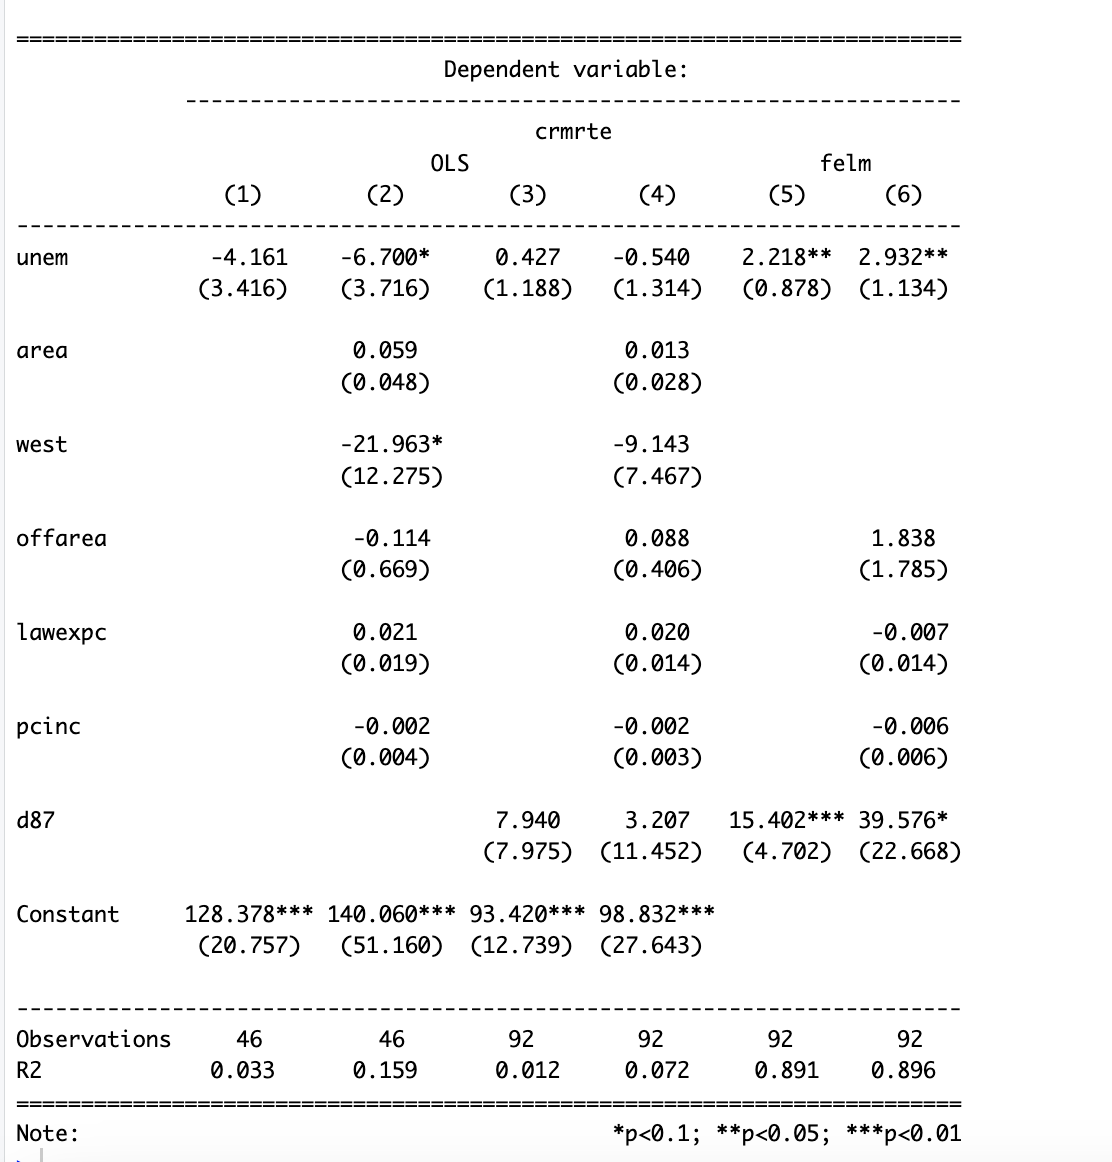


## Looking at the beta hat for unemployment in each column (1), (2), etc

In column (1) beta hat of unemployment is Large, negative, but not significant

In column (2) when control for other city controls, betahat of unemployment is large, negative and significant at ten percent level (t stat 1.8)

In column (3) Adding one more year the sign of the behat unemployment coefficient is now positive and not significant

In column (4), Adding one more year and also city controls, the  sign of beta hat for unemployment flipped to negative and not significant Also, in (4) none of the other city controls are significant. 

And, in (4) still many omitted factors that can affect crime rate: good mayor, gangs, gun ownership, etc etc. Because of this, we will add city fixed effects in column (5), capturing anything specific to each city that does not vary over time.

In column (5), controlling for all constant characteristics of cities (that do not vary over time) =city fixed effects,  and for effect of time (dummy for year 87)  that captures changes in 1987 relative to 1982 factors that affect crime rate that are common to all cities, a 1 percent point increase in unemployment rate is associated with a significant  2.2. per thousand increase in crime rate

How do you interpret column (6) results?

Do it yourself



Daily Assignment if you like

In reg (6) controlling for city specific time varying factors such as officers per square mile, law enforcement expenditure, per capita income, as well as the controls in (5) above, the effect is very stable, in (6) it is 2.93. 

WHY CAN WE NOT ESTIMATE IN (6) A COEFFICIENT ON AREA AND and also one for WEST REGION?

Why does R drop them out of the regression?

Given that the coefficient on unemployment changes from 2.1 to 2.93 (when we control for officers per square mile), what is the sign of the correlation of officers per square mile and unemployment rate (assuming that officers per square mile are negatively correlated with crime rate)?
